<a href="https://colab.research.google.com/github/sachaathias/FMSI_Project_Discrete_logarithm_attack/blob/master/Projet_de_FMSI_2021_Sacha_Paul_Margot_Elie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projet fondement Mathématique pour la Sécurité Informatique 2021
(pour exécuter le code python il faut bénéficier d'un interpréteur python2)

#I)Protocole de Diffie Hellman
##1) Présentation du protocole

De nos jours, l'enjeu de la sécurité dans le monde de l'informatique est un thème essentiel. Pour garantir la confidentialité des échanges de données, de nombreux algorithmes ont été conçus. La sécurité a souvent reposé sur des algorithmes de chiffrement dits symétriques. En cryptographie, on dit d'une méthode de chiffrement qu'elle est symétrique si les deux partis possèdent la même clé. Celle-ci peut être utilisée pour chiffrer le message comme pour le déchiffrer. Donc toute la force de ces algorithmes repose sur la confidentialité de la clé.
 
Toutes les méthodes de chiffrement symétrique utilisées jusque-là souffrent du même problème. Il s'agit d'arriver à partager de manière sécurisée la clé secrète. Avec l'essor d'Internet il devient de plus en plus facile de s'interposer dans une communication entre deux entités, et donc potentiellement d'intercepter la clé.

On se place dans la situation suivante: 2 personnes, habituellement dénommées Alice et Bob, échangent des informations via un réseau. Un intrus, Charlie, espionne les transmissions. Dans ce contexte, les quatre buts principaux de la cryptographie sont:

* La confidentialité. Les textes codés et envoyés par Alice et Bob ne doivent pas être compris par Charlie
* L’authentification. Bob doit pouvoir être sûr que l’auteur du message est bien Alice et non une autre personne
* L’intégrité. Le message d’Alice reçu par Bob n’a pas pu être modifié par Charlie lors de la transmission
* La non-répudiation. Alice ne peut pas nier être l’auteur et avoir envoyé son message une fois que celui-ci est transmis
 
Dans les années 70, 2 cryptologues américains Whitfield Diffie et Martin Hellman, mettent au point un nouveau protocole permettant de garantir la confidentialité de la clé secrète durant l'échange.
<br/><br/>
##2) Déroulement du protocole

Le protocole se déroule en plusieurs étapes:
1. Dans un premier temps les deux entités génèrent un nombre premier et un générateur qui leur sont communs.
2. Par la suite chacun génère une clé privée qu'ils gardent précieusement.
3. Grâce aux clés privées, chacun calcule la clé publique associée à leur clé privée respective.
4. Ils s'échangent leur clé publique générée précédemment.
5. Pour finir via la clé publique qu'ils ont reçue, ils peuvent calculer une nouvelle clé secrète commune qui leur permettra de chiffrer/déchiffrer toutes leurs communications.

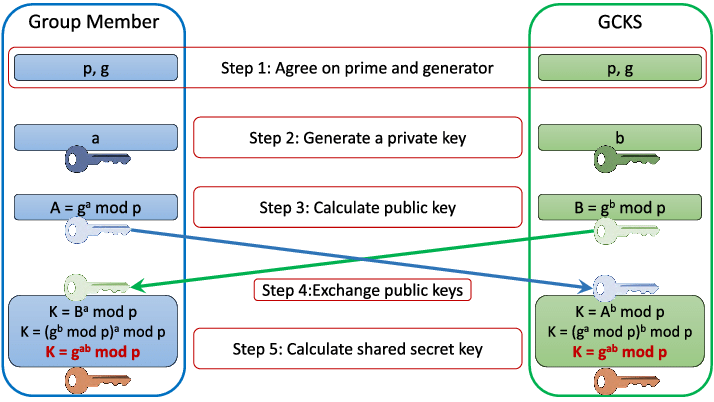

(schéma illustrant le protocole de Diffie-Hellman)


In [ ]:
from random import randint
 
if __name__ == '__main__':
    # ----------------------------------------------- 
    # Step 1 each side Agree on prime P and generator
    # -----------------------------------------------

    P = 531137992816767098689588206552468627329593117727031923199444138200403559860852242739162502265229285668889329486246501015346579337652707239409519978766587351943831270835393219031728127
    G = 6864797660130609714981900799081393217269435300143305409394463459185543183397656052122559640661454554977296311391480858037121987999716643812574028291115057151
     
    print('The Value of P is :%d'%(P))
    print('The Value of G is :%d'%(G))
    
    # ----------------------------------------------
    # Step 2 Alice and Bob generate a private key
    # ----------------------------------------------

    a = 12345678900987654321234567890
    print('The Private Key a for Alice is :%d'%(a))
    
    b = 987654321234567898765432123456780
    print('The Private Key b for Bob   is :%d'%(b))

    # ----------------------------------------------
    # Step 3 Alice and Bob generate their respective public key
    # ----------------------------------------------
    # Alice public Key
    x = int(pow(G,a,P))
    print('Alice\'s public key is : %d'%(x)); 
    
    # Bob public Key
    y = int(pow(G,b,P)) 
    print('Bob\'s public key   is : %d'%(y));
    # ----------------------------------------------
    # Step 4 Exchange public keys
    # ----------------------------------------------

    # ----------------------------------------------
    # Step 5 Alice and Bob generate the shared private key
    # ----------------------------------------------
    # Secret key for Alice
    ka = int(pow(y,a,P))
     
    # Secret key for Bob
    kb = int(pow(x,b,P))
     
    print('Secret key for the Alice is : %d'%(ka))
    print('Secret Key for the Bob   is : %d'%(kb))

The Value of P is :531137992816767098689588206552468627329593117727031923199444138200403559860852242739162502265229285668889329486246501015346579337652707239409519978766587351943831270835393219031728127
The Value of G is :6864797660130609714981900799081393217269435300143305409394463459185543183397656052122559640661454554977296311391480858037121987999716643812574028291115057151
The Private Key a for Alice is :12345678900987654321234567890
The Private Key b for Bob   is :987654321234567898765432123456780
Alice's public key is : 467261144360377384747830740652875631741086930420033099502277052373048764477417301687069620434264794577419248683029817742000791627468222016102729720689413499345025652181851840856326961
Bob's public key   is : 160951289677013798115824080310466160034487645510088028286143443048454115754191357189093396727405284488106983515980649620187507872323612006564649969456361120493710526726629268296220821
Secret key for the Alice is : 1547830433768305831957343202249779374772865474

##3) Fondement Mathematique derrière le protocole
Un cryptosystème à clé publique s’appuie sur une fonction dite à sens unique. Essentiellement, il s’agit d’une fonction f telle que :


* il est facile d’évaluer $f(x)$ lorsqu’on connaît $x$ dans l’espace de définition de $f$ ;
* connaissant un $y$ dans l’espace d’arrivée, il est difficile de trouver un $x$ tel que $f(x)=y$.

Les caluls sont effectués dans un groupe d'ordre $p$. Sachant cela, on peut dès lors affirmer que l'associativité est respectée. Ainsi, l'égalité: $(g^a)^b = (g^b)^a$ est valide. Cela garantit que les 2 entités possèdent la même clé secrète.

La sécurité de ce protocole réside dans la difficulté du problème du logarithme discret: pour que Charlie retrouve $g^{ab}$ à partir de $g^a$ et $g^b$, elle doit élever $g^a$ à la puissance $b$ (resp. à la puissance $a$). Mais déduire $a$ (resp. b) de $g^a$ (resp. $g^b$) est un problème que l'on ne sait pas résoudre efficacement dans le cas général. Charlie est donc dans l'impossibilité (calculatoire) de déduire des seules informations $g$, $g^a$, $g^b$ et $p$, la valeur de $g^{ab}$.
<br/><br/>
##4) Parrallèle avec l'algorithme de Pohlig-Hellman
Il existe tout de même une faille dans ce protocole. De nos jours, les attaques dites de l'homme du milieu ne sont pas rares. Cette attaque consiste en l'interception de données entre les entités. Même si le protocole protège la transmission de la clé de chiffrement/déchiffrement, via une attaque de l'homme du milieu il est possible d'intercepter $g^a$ et $g^b$ parcequ'elles sont échangées en clair. Il en est de même pour $g$ et $p$ qui sont censés être connus de tous. Grâce à ces informations acquises via l'attaque de l'homme du milieu il est possible de calculer le logarithme discret de $g^a$ et $g^b$ qui est normalement impossible, car des algorithmes ont été établis afin d'attaquer le problème du logarithme discret. Par exemple l'algorithme de Pohlig-Hellman, qui est présenté par la suite.

Lors de l'attaque, l'homme du milieu peut intercepter la première clé $g^a$ et en générer une autre $g^{a'}$ qu'il transmet au destinataire original. Il se fait alors passer pour l'expéditeur. Pour parer cette attaque les échanges sont signés via un chiffrement asymétrique, ce qui permet d'authentifier l'entité qui émet la communication. Il s'agit du système de certificat qu'on retrouve notamment dans le protocole SSL/TLS.
<br/><br/><br/>

#II) Algorithme de Pohlig-Hellman
##1) Le problème du logarithme discret
Soit $G = \langle g \rangle$ un groupe cyclique engendré par $g$. Soient $y$ un élément de $G$, et $N$ l'ordre de $G$.

Trouver $x \in \mathbb{Z}$ tel que $g^x = y$ est le problème du logarithme discret en base $g$. <br/>
On note $ℓ = \log_g y$.<br/>
Si une telle solution existe, alors il en existe une dans {0, 1, 2, ...., N-1};<br/><br/>
Exemple:<br/>
Prenons $G = (\mathbb{Z}/11\mathbb{Z})$, on a donc $G= \{\bar{1}, \bar{2}, \bar{3}, \bar{4},\bar{5} ,\bar{6} , \bar{7}, \bar{8}, \bar{9},\bar{10}\}$<br/>
Le groupe cyclique $G$ engendré, par exemple, par $g=\bar{2} \in G$ peut s'écrire de la manière suivante: $G =\{g^0, g^1, g^2, g^3, g^4, g^5, g^6, g^7, g^8, g^9\}$ <br/>
Il est intéressant de remarquer que l’algorithme d’exponentiation rapide est générique: il peut s’utiliser dans n’importe quel groupe $G$ pour calculer $g^ℓ$ en effectuant moins de $2\logℓ$ multiplications dans $G$. Ainsi, connaissant $G$, $g$ et $ℓ$, il est facile de calculer $g^ℓ$ dans $G$.<br/>
En revanche, pour la réciproque il s'agit d'une tache bien plus complexe. Le  théorème de Shoup expose tout à fait cela. Il énonce que: <br/>
* "Dans un groupe générique d'ordre p premier, la résolution du problème du logarithme discret nécessite au moins $\sqrt{p}$ multiplications"

Ainsi en reprenant l'exemple précédent, il est facile de retrouver $8 = log_\bar{2}\bar{3}$. Cependant des qu'on se place dans un ensemble bien plus grand comme $G=(\mathbb{Z}/p\mathbb{Z})$ avec $p=10^{100}+43723255221$, obtenir $log_\bar{2}\bar{3}$ devient très compliqué.
<br/><br/>
##2) L'algorithme de Pohlig-Hellman
L'algorithme de Polig-Hellman est un algorithme pour résoudre le problème du logarithme discret. Il a été introduit par Roland Silver, mais d'abord publié par Stephen Pohlig et Martin Hellman.

On se trouve dans la situation suivante: Soient $G$ un groupe d'ordre $p$, $g$ le générateur de ce groupe et $h$ un élément arbitraire pour lequel nous souhaitons retrouver un logarithme $x$ tel que $g^x \equiv h \ {mod}\ p$. Nous supposons par ailleurs que la factorisation de l’ordre du groupe est connue et donnée par:

>|$G$| = $\prod_{p_i}p_i^{e_i}$

L’algorithme de Pohlig-Hellman permet de réduire le problème du logarithme
discret dans $G$ aux problèmes du logarithme discret dans les groupes cycliques
d’ordre premier $p_i$ moindres. La méthode s’articule autour des 2 phases suivantes:
* La réduction aux ordres des puissances de nombres premiers
* La réduction aux ordres premiers

###a) Réduction aux ordres des puissances de nombres premiers

Tout d’abord nous réduisons le problème du logarithme discret dans $G$ aux
problèmes du logarithme discret dans des groupes d’ordre les puissances des
nombres premiers $p_i$ impliquées dans la factorisation de $|G|$. Pour chaque $p_i$ nous posons: <br/>
>$|G_i| = \frac{n}{p_i^{e_i}}$<br/>
>$g_i = g^{|G_i|}$<br/>
>$h_i = h^{|G_i|}$

Ainsi, $g_i^{p_i^{e_i}} = g^n = 1$ et l’ordre de $g_i$ est exactement $p_i^{e_i}$. Par ailleurs nous obtenons $g_i^x = g^{G_i|x} = h^{|G_i|} = h_i$.<br/> Ainsi $h_i$ appartient au sous-groupe d’ordre $p^{e_i}_i$
engendré par $g_i$. Plus précisément, $h_i$ peut être considéré comme la projection de l’élément dont on souhaite trouver un logarithme discret sur le sous-groupe engendré par $g_i$. Sans originalité, appelons $x_i$ le logarithme discret de $h_i$ en base $g_i$. Ceci nous permet d’écrire la relation:

>$x \equiv x_i \ {mod}\ p_i^{e_i}$

Puisque les $p_i^{e_i}$ sont 2 à 2 premiers entre eux, si nous connaissons tous les $x_i$, une application simple du théorème des restes chinois nous permet de retrouver l’entier $x$.

###b)Réduction aux ordres premiers

Une réduction similaire autorise ensuite à réduire le problème du logarithme discret dans un groupe d’ordre une puissance d’un nombre premier au problème du logarithme discret dans le sous-groupe d’ordre ce nombre
premier précisément.
Soit $G$ un groupe cyclique de cardinal $p^e$ une puissance d’un nombre
premier $p$. Considérons $g$ un générateur de $G$ et $a$ un élément quelconque
de $G$. Nous souhaitons retrouver le plus petit entier $x$ tel que $a$ = $g^x$. Comme $x \le p^e$, nous pouvons noter son écriture en base p :

> $x = \sum_{j= 0}^{e-1}x_jp^j$

où $0 \le x_j \le p$ pour tout entier $j$ dans l’intervalle de la somme. Montrons alors
que chaque coefficient $x_j$ peut être vu comme un logarithme discret dans un
certain groupe d’ordre $p$. Pour commencer, multiplions par $p^{e-1}$ l’écriture ci-dessus. Nous obtenons $p^{e-1}x = p^{e-1}x_0 + p^e \sum_{j=1}^{e-1}x_jp^{j-1}$.

Or, en élevant à la puissance $p^{e-1}$ l’équation $a = g^x$, il vient $a^{p^{e-1}} = g^{p^{e-1}x}$ et par conséquent $a^{p^{e-1}} = g^{p^{e-1}x_0}$ car l’ordre du groupe est précisément $p^e$. Cette dernière équation permet
d’interpréter $x_0$ comme le logarithme discret de $a^{p^{e-1}}$
dans le sous-groupe d’ordre $p$ engendré par $g^{p^{e-1}x}$. En effet, $g^{p^{e-1}x}$ est bien d’ordre $p$, par définition de g.

Une récurrence sur les coefficients suivants nous permet de conclure. Autrement dit, supposons que $x_0, .., x_{i -1}$ aient été déterminés comme des logarithmes discrets. Nous pouvons interpréter $x_i$ de nouveau comme le logarithme discret d’un élément – ici le membre de gauche – dans le même sous-groupe d’ordre $p$
engendré par $g^{p{e-1}}$
. Ainsi, le calcul de tous les $x_j$ pour $j$ variant de $0$ à $e-1$,
qui ne sont autres que des calculs de logarithmes discrets dans le sous-groupe
d’ordre $p$, permettent de reconstituer le logarithme $x$ cherché.

Pour résumer, l’idée essentielle qu’il est important de retenir est la suivante: Calculer des logarithmes discrets dans un groupe général $G$ n’est pas plus difficile que de calculer des logarithmes discrets dans chacun de ses sous-groupes d’ordre premier. Aussi, pour la sécurité des cryptosystèmes à base de logarithme discret dans un groupe G, il est préférable voire essentiel de prendre des groupes dont l’ordre est un nombre premier. Un nombre premier ne pouvant être divisé que par 1 ou lui-même, il sera donc impossible de décomposer le problème du logarithme discret en plusieurs sous problèmes.
<br/><br/>

![lol.png](https://upload.wikimedia.org/wikipedia/commons/6/66/Pohlig-Hellman-Diagram.svg?uselang=fr)

(schéma illustrant le principe de l'algorithme de Pohlig-Hellman)

In [ ]:
def brute_force_log_discret(x, G, P):
        ret = 0
        curr_x = 1
        while (curr_x % P) != (x % P):
            ret += 1
            curr_x *= G
        return ret



In [ ]:
def euclideEtendu(a, b):
    r0, u0, v0, r1, u1, v1 = a, 1, 0, b, 0, 1
    while r1 != 0:
        q = r0 // r1
        r0, u0, v0, r1, u1, v1 = r1, u1, v1, r0 - q * r1, u0 - q * u1, v0 - q * v1
    return (r0, u0, v0)

In [ ]:
from functools import reduce

def chinese_remainder(pairs):
  total = reduce(lambda a, b: a*b[1], pairs, 1)
  x0 = 0
  for ai, mi in pairs:
    Mi = total // mi
    ui = euclideEtendu(Mi, mi)[1]
    x0 = x0 + ai * Mi * (ui % mi)
  return x0 % total

assert chinese_remainder(zip([3, 2, 4], [5, 6, 7])) == 158
assert chinese_remainder(zip([2, 3, 2], [3, 5, 7])) == 23
assert chinese_remainder(zip([15, 16], [27, 20])) == 96
assert chinese_remainder(zip([1, 2, 3, 4], [2, 3, 5, 7])) == 53

In [ ]:
from math import sqrt, ceil
import time

perf = True

def PrimeFactorization(p):
    """Find all prime factors of the number p"""
    d, primeFactors = 3, []
    i = 0
    while p % 2 == 0:
      i += 1
      p //= 2
    if i != 0:
      primeFactors.append((2, i))
    sp = ceil(sqrt(p))
    while d <= sp:
        i = 0
        while (p % d) == 0:
            i += 1
            p //= d
        if i != 0:
          primeFactors.append((d, i))
        d += 2
    if p > 1:
       primeFactors.append((p, 1))
    return primeFactors

def ModularInverse(b, n):
    """Return x s.t. x ≡ a^(-1) (mod n)"""
    g, x, _ = euclideEtendu(b, n)
    if g == 1:
        return x % n

def ShanksAlgorithm(alpha, beta, n):
    """Return x s.t. beta ≡ alpha^(x) (mod n)"""
    m = int(ceil(sqrt(n - 1)))
    a = pow(alpha, m, n)
    b = euclideEtendu(alpha, n)[1]
    L1 = []
    #On a essayé de passer par une hash table pour optimiser la recherche mais ça ne marche pas
    #L1h = {} 
    apj = 1
    for j in range(m):
      #L1h[apj] = j
      L1.append((j, apj))
      apj = (apj * a) % n
    L2 = []
    gamma = beta
    for i in range(m):
      L2.append((i, gamma))
      gamma = (gamma * b) % n
    j = 0
    gamma = beta
    while j < m:
        i = 0
        while i < m:
            if L1[j][1] == L2[i][1]:
                return m * L1[j][0] + L2[i][0]
            i += 1
        j += 1
        gamma = (gamma * b) % n

def CongruencePair(p, q, e, e1, e2, qe1):
    """Return pair (x, q ** e) which represents one congruence"""
    alphaInverse = ModularInverse(e1, p)
    x = 0 # x = x_{0} + x_{1} * q + x_{2} * q^{2} + ... + x_{e - 1} * q^{e - 1}
    a = pow(e1, qe1, p)
    qei = qe1
    qi = 1
    eax = e2 * pow(alphaInverse, x)
    for i in range(1, e + 1):
        b = pow(eax, qei, p)
        tmp = ShanksAlgorithm(a, b, p) * qi
        qi *= q
        eax *= pow(alphaInverse, tmp)
        x += tmp
        qei //= q;
    return x

def PrintFormated(arg1, arg2, arg3, arg4, arg5):
    print(" {:3s} | {:3s} | {:13s} | {:13s} | {:45s}".format(str(arg1), str(arg2), str(arg3), str(arg4), str(arg5)))
    print("-"*90)



def PohligHellman(g, h, p, CountOccurencesList):
    """Main function of Pohlig-Hellman's algorithm"""
    CongruenceList = []
    g %= p

    if not perf:
      print("\n")
      print("-"*90)
      print(" Solving %d ≡ %d^x (mod %d)" % (g, h, p))
      print("-"*90)
      PrintFormated("q", "e", "g^((p-1)/q^e)", "h^((p-1)/q^e)", "Solve (g^((p-1)/q^e))^x = h^((p-1)/q^e) for x")

    for q,e in CountOccurencesList:
        qe1 = pow(q, e - 1)
        qe = (qe1 * q) % p
        puiss = (p - 1) // qe
        e1 = pow(h, puiss, p) # e1 = g^((p-1)/q^e)
        e2 = pow(g, puiss, p) # e2 = h^((p-1)/q^e)
        # Add new congruence
        CongruenceList.append((CongruencePair(p, q, e, e1, e2, qe1), qe))
        e3 = CongruenceList[len(CongruenceList) - 1][0] % CongruenceList[len(CongruenceList) - 1][1] # e3 = (g^((p-1)/q^e))^x
        e4 = CongruenceList[len(CongruenceList) - 1][1] # e4 = h^((p-1)/q^e)
        if not perf:
          PrintFormated(q, e, e1, e2, "x ≡ %2d (mod %2d)" % (e3, e4))

    # Solve the system of congruences
    res = chinese_remainder(CongruenceList)
    if not perf:
      print(" Solution x = %d" % res)
      print("-"*90)
      print("\n")
    return res

if __name__ == '__main__':
    print("="*90)
    print("Pohlig-Hellman's algorithm for descrete logartihm")
    print("Formula : h ≡ g^x (mod p)")
    print("="*90)
    print("\n")

    # TEST EXAMPLES(h, g, p)         SOLUTIONS
    start = time.clock()
    p29 = PrimeFactorization(29 - 1)
    p433 = PrimeFactorization(433 - 1)
    p8101 = PrimeFactorization(8101 - 1)
    p809 = PrimeFactorization(809 - 1)
    p41 = PrimeFactorization(41 - 1)
    p131 = PrimeFactorization(131 - 1)
    p1255211 = PrimeFactorization(1255211 - 1)

    for i in range(8):
      assert PohligHellman(18, 2, 29, p29)     ==   11
      assert PohligHellman(166, 7, 433, p433)   ==   47
      assert PohligHellman(7531, 6, 8101, p8101) ==   6689
      assert PohligHellman(525, 3, 809, p809)   ==   309
      assert PohligHellman(12, 7, 41, p41)     ==   13
      assert PohligHellman(70, 2, 131, p131)    ==   13
      #assert PohligHellman(525, 2, 809, p809)   ==   no solution
      assert PohligHellman(525, -2, 131, p131)  ==   0
      assert PohligHellman(1254, 12569, 1255211, p1255211) == 1086464
      if not perf:
        break
    end = time.clock()
    print("time: " + str(end - start) + "sec")


Pohlig-Hellman's algorithm for descrete logartihm
Formula : h ≡ g^x (mod p)


time: 0.023367sec


In [ ]:
if __name__ == '__main__':
  #pP = PrimeFactorization(P - 1)
  p1255211 = PrimeFactorization(1255211 - 1)
  #assert PohligHellman(a, G, P, pP) == ka
  #assert PohligHellman(b, G, P, pP) == kb

##3) Calcul de logarithme discret dans un groupe général en la racine de l’ordre du groupe
Diverses méthodes permettent de calculer des logarithmes discrets dans
un groupe général $G$ en $\mathcal{O}(\sqrt{|G|})$
opérations. La plus connue d’entre elles, qui est aussi probablement la plus simple à aborder, a été présentée par Shanks sous le nom de méthode des pas de bébés – pas de géants (Baby Step – Giant Step technique en anglais).

### a) L'algorithme de Shanks
Pour résoudre $a = g^x$ dans $G$ avec $0 ⩽ x < n$, on écrit $x = cu + d$, avec $u$ un entier à déterminer, $c$ et $d$ les quotient et reste de $x$ par $u$. On réécrit l’équation $a = g^x$ sous la forme :
>$a = (g^u)^c . g^d$
; avec $0 ⩽ d < u$ et $0 ⩽ c < \frac{n}{u}$.

Si l’on note $g−1$ l’inverse de $g$ dans $G$, on en déduit :
> $a (g^{−u})^c = g^d$

Nous avons ramené le problème à un problème à deux variables séparées. On commence par calculer tous les $b_d = g^d$ pour tous les $d$ possibles, de $1$ en $1$, appelés pas de bébé. Puis pour chaque valeur de $c$, on calcule de proche en proche la quantité $a(g{−u})^c$, ce sont les pas de géant. Si pour un $c$ donné, on trouve une identité $(g^{−u})^c = b_d$, on a gagné.

Comment analyse-t-on cet algorithme ? Le nombre d’opérations de groupes est essentiellement $u$ pas de bébé et au pire $\frac{n}{u}$ pas-de-géant. Le nombre total est minimal pour $u = \sqrt{n}$, conduisant à un nombre $2\sqrt{n}$. L’espace mémoire de stockage pour les $b_d$ est également de $\sqrt{n}$ éléments de $G$. D’un point de vue pratique, il est vital de stocker les $b_d$ avec une table de hachage, pour garantir des tests d’appartenance rapides aux pas de bébé.

Il existe un autre algorithme de calcul de logarithmes discrets en temps $\mathcal{O}(\sqrt{n})$, qui utilise peu de stockage, l’algorithme (probabiliste) de Pollard. Cependant lors de l'implémentation de l'algorithme de Pohlig-Hellman nous avons utilisé l'algorithme Baby step - Giant step
<br/><br/>
##4) Complexité
Comme expliqué en II.2.b, le problème du logarithme discret sera d'autant plus compliqué qu'on choisira un groupe d'ordre premier. Ainsi l'entrée la plus défavorable de l'algorithme de Pohlig–Hellman est un groupe d'ordre premier. Dans un tel cas, elle se dégrade en algorithme à pas de géant, d'où la complexité temporelle dans le pire des cas. Cependant, il est beaucoup plus efficace si l'ordre est lisse. Plus précisément, si c'est la factorisation première de $n$, alors la complexité de l'algorithme est $\mathcal{O}(\sqrt{n})\prod_ip_i^{e_i}n$ 

>$\mathcal{O}(\sum_ie_i(\log{n} + \sqrt{p_i}))$ opérations de groupe.


<br/><br/><br/>

In [ ]:
'''
Mise en Situation d'une attaque ManInTheMiddle 
lorsque deux utilisateurs (Alice et Bob) communique
leurs cle secrete via le protocole Diffie-Hellman.
'''
if __name__ == '__main__':
    '''
    Step 1 each side Agree on prime P and generator
    '''

    P = 605015399	
    G = 8980702867	

    '''
    Step 2 Alice and Bob generate a private key
    '''
    a = 76569149
    print('The Private Key a for Alice is :%d'%(a))
    
    b = 98987461
    print('The Private Key b for Bob   is :%d'%(b))

    '''
    Step 3 Alice and Bob generate their respective public key
    '''
    x = int(pow(G,a,P))
    print('Alice\'s public key is : %d'%(x)); 
    
    # Bob public Key
    y = int(pow(G,b,P)) 
    print('Bob\'s public key   is : %d'%(y));
    '''
    Step 4 Exchange public keys

    Charlie (the man who's listenning the conversation)
    catch P, G , Alice's & Bob's public keys
    '''

    '''
    Step 5 Alice and Bob generate the shared private key
    '''
    # Secret key for Alice
    ka = int(pow(y,a,P))
     
    # Secret key for Bob
    kb = int(pow(x,b,P))
     
    print('Secret key for the Alice is : %d'%(ka))
    print('Secret Key for the Bob   is : %d'%(kb))

    # Step 6 The attack
    start = time.clock()
    facto = PrimeFactorization(P-1)
    
    alicePrivateKey = PohligHellman(x, G, P, facto)

    
    attackedKey = int(pow(y,alicePrivateKey,P))
    end = time.clock()

    print('The key stolen by Charlie is : %d'%(attackedKey))
    print('Charlie got the key in %d sec'%(end - start))
    assert attackedKey == ka
    assert attackedKey == kb

    # Ca prend un peu de temps a afficher le resultat de l'attaque

    # Now Charlie try to get the result by brute force attack
    start = time.clock()
    attackedKey = brute_force_log_discret(x, G, P)
    end = time.clock()

    print('Brute force attack result ==> d%'%(attackedKey))
    print('Brute force attack time ==> d%'%(end - start))


The Private Key a for Alice is :76569149
The Private Key b for Bob   is :98987461
Alice's public key is : 3874932
Bob's public key   is : 560223049
Secret key for the Alice is : 420467049
Secret Key for the Bob   is : 420467049
The key stolen by Charlie is : 420467049
Charlie got the key in 162 sec


#Conclusion

On remarque que pour résoudre le problème du logarithme discret, l'algorithme de Pohlig-Hellman consomme une période de temps qui n'est tout de même pas négligeable, mais reste bien plus performant qu'une attaque brute force. L'attaque reste réalisable en pratique, ce qui oblige les sujets à additionner les protections (comme la mise en place de certificats électroniques)  afin d'échanger leurs clés de manière sécurisée. Lors de l'implémentation de l'algorithme d'attaque du logarithme discret (Pohlig- Hellman), on a remarqué que lorsque l'on cherche un double (avec l'algorithme de Shanks) nous pouvions utiliser une table de hachage. Ce qui aurait grandement augmenté  les performances.

-- <br/>
Sacha ATHIAS<br/>
Elie BRAMI<br/>
Paul GROLIER<br/>
Margot LORD

ING 1
